# Desafio 1 - Digitral House

Lendo e propondo análises para o banco de dados do IBGE.

### As hipóteses a serem testadas:  

    1 - Os salários da região Sul são maiores que os da região Norte?
    2 - Existe alguma região com salário médio maior que outra?

### Importando os dados 

In [2]:
df = pd.read_csv(r'./data/data.csv') # abrindo o arquivo csv

In [3]:
df.head() # lendo os dados

,id,idade,sexo,anos_estudo,cor/raca,salario,estado_civil,regiao
0,1.100190e+10,53,homem,5.0,Parda,63600.000000,1.0,norte
1,1.100190e+10,49,mulher,8.0,Amarela,NaN,1.0,norte
2,1.100190e+10,22,mulher,11.0,Indigena,4352.400391,0.0,nordeste
3,1.100190e+10,55,homem,15.0,Amarela,96600.000000,1.0,norte
4,1.100190e+10,56,mulher,15.0,Amarela,157800.000000,1.0,norte


In [4]:
df.regiao.value_counts(dropna=False) #verificando quantidades por região

sudeste         25220
centro-oeste    14702
norte           14653
sul             11890
nordeste            5
Name: regiao, dtype: int64

### Tratando os dados 

In [5]:
df.drop(df[df.regiao=="nordeste"].index ,inplace=True) #excluindo a regiao nordeste por falta de registros

In [52]:
df = df.replace('gestante', 'mulher') # função para corrigir o gênero
df['sexo'].value_counts(dropna=False)

mulher    33674
homem     32791
Name: sexo, dtype: int64

In [7]:
df['estado_civil'].value_counts(dropna=False) #verificando a variável estado civil

1.0    39063
0.0    27402
Name: estado_civil, dtype: int64

In [8]:
df['estado_civil']= df['estado_civil'].replace(1, "Casado")  #alterando de 1 para casado
df['estado_civil']= df['estado_civil'].replace(0, "Solteiro")  # alterando de 0 para solteiro
df['estado_civil'].value_counts(dropna=False)

Casado      39063
Solteiro    27402
Name: estado_civil, dtype: int64

In [9]:
df['anos_estudo'].value_counts(dropna=False) #verificando a variável anos de estudo

 5.0     23347
 11.0    16788
 15.0     5635
 8.0      5017
 10.0     2704
 7.0      2612
 12.0     2610
 9.0      2474
 6.0      2237
 13.0     1348
 14.0     1259
NaN        434
Name: anos_estudo, dtype: int64

In [10]:
df['anos_estudo'].fillna(df['anos_estudo'].mean(),inplace=True) # tratando os NaN de anos estudo com a média

In [11]:
df.rename(columns={'cor/raca':'cor_raca'},inplace=True) #retirando a barra no nome da coluna, boas práticas

In [12]:
df.info() # verificando a tipagem e se há discrepâncias nos conteúdos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66465 entries, 0 to 66469
Data columns (total 8 columns):
id              66465 non-null float64
idade           66465 non-null int64
sexo            66465 non-null object
anos_estudo     66465 non-null float64
cor_raca        66223 non-null object
salario         47875 non-null float64
estado_civil    66465 non-null object
regiao          66465 non-null object
dtypes: float64(3), int64(1), object(4)
memory usage: 4.6+ MB


In [13]:
df['salario'].value_counts(dropna=False).nlargest(7) #verficando os nulos, zeros e negativos em salário

NaN          18590
 0.0          1841
-1.0          1101
 999999.0      367
 5229.0        277
 7200.0        260
 7560.0        244
Name: salario, dtype: int64

In [14]:
df.salario.median() #calculando a mediana

7113.599609375

In [15]:
df_sul = df[df['regiao'] == 'sul']
df_norte = df[df['regiao'] == 'norte']
df_sudeste = df[df['regiao'] == 'sudeste']
df_centro_oeste = df[df['regiao'] == 'centro-oeste']

In [16]:
media_sul = df_sul.salario.median()
media_sudeste = df_sudeste.salario.median()
media_norte = df_norte.salario.median()
media_centro_oeste = df_centro_oeste.salario.median()

In [17]:
df_sul['salario'].fillna(media_sul,inplace=True)#atualizando salário NaN com a mediana
df_sul['salario']= df_sul['salario'].replace(-1, media_sul)
df_sul['salario']= df_sul['salario'].replace(999999, media_sul)

df_norte ['salario'].fillna(media_norte,inplace=True)
df_norte['salario']= df_norte['salario'].replace(-1, media_norte)
df_norte['salario']= df_norte['salario'].replace(999999, media_norte)

df_sudeste['salario'].fillna(media_sudeste,inplace=True)
df_sudeste['salario']= df_sudeste['salario'].replace(-1, media_sudeste)
df_sudeste['salario']= df_sudeste['salario'].replace(999999, media_sudeste)

df_centro_oeste['salario'].fillna(media_centro_oeste,inplace=True)
df_centro_oeste['salario']= df_centro_oeste['salario'].replace(-1, media_centro_oeste)
df_centro_oeste['salario']= df_centro_oeste['salario'].replace(999999, media_centro_oeste)


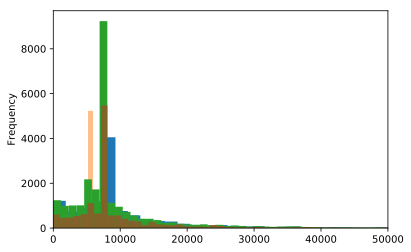

In [55]:
df_sul['salario'].plot.hist(bins=500, alpha=1, xlim=(0, 50000)) # histograma sul, com valores outliers 
df_norte['salario'].plot.hist(bins=500,alpha=0.5, xlim=(0, 50000)) # histograma norte, com valores outliers
df_sudeste['salario'].plot.hist(bins=500, alpha=1, xlim=(0, 50000)) # histograma sul, com valores outliers 
df_centro_oeste['salario'].plot.hist(bins=500,alpha=0.5, xlim=(0, 50000)) # histograma norte, com valores outliers


# Normalização pela subtração da média e divisão pelo desvio padrão, criando uma coluna normal_log_salario, por região.

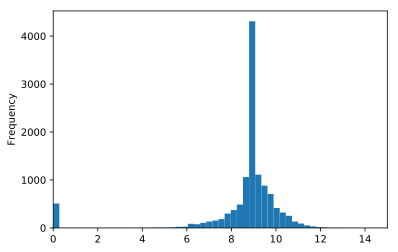

In [19]:
#função log
df_sul['log_salario'] = np.log1p(df_sul['salario'])
df_sudeste['log_salario'] = np.log1p(df_sudeste['salario'])
df_norte['log_salario'] = np.log1p(df_norte['salario'])
df_centro_oeste['log_salario'] = np.log1p(df_centro_oeste['salario'])

df_sul['log_salario'].plot.hist(bins=50, alpha=1, xlim=(0, 15))

# Normalizando a curva do salário, criando a coluna log_salario, por região

In [56]:
#normalização pela subtração da média e dividido pelo desvio padrão, próprios
df_sul['normal_log_salario'] = ( df_sul['log_salario'] - df_sul['log_salario'].mean() ) / df_sul['log_salario'].std()
df_sudeste['normal_log_salario'] = ( df_sudeste['log_salario'] - df_sudeste['log_salario'].mean() ) / df_sudeste['log_salario'].std() 
df_norte['normal_log_salario'] = ( df_norte['log_salario'] - df_norte['log_salario'].mean() ) / df_norte['log_salario'].std() 
df_centro_oeste['normal_log_salario'] = ( df_centro_oeste['log_salario'] - df_centro_oeste['log_salario'].mean() ) / df_centro_oeste['log_salario'].std()

In [21]:
df_regioes = pd.concat([df_sul,df_norte, df_sudeste, df_centro_oeste])

In [22]:
df_regioes.loc[(df_regioes.salario <= 1000), 'faixa_salario'] = 'A-<1000' 
df_regioes.loc[(df_regioes.salario >= 1000.01) & (df_regioes.salario <= 2000), 'faixa_salario'] = 'B-1000-2000' 
df_regioes.loc[(df_regioes.salario >= 2000.01) & (df_regioes.salario <= 3000), 'faixa_salario'] = 'C-2001-3000' 
df_regioes.loc[(df_regioes.salario >= 3000.01) & (df_regioes.salario <= 4000), 'faixa_salario'] = 'D-3001-4000' 
df_regioes.loc[(df_regioes.salario >= 4000.01) & (df_regioes.salario <= 5000), 'faixa_salario'] = 'E-4001-5000' 
df_regioes.loc[(df_regioes.salario >= 5000.01) & (df_regioes.salario <= 6000), 'faixa_salario'] = 'F-5001-6000' 
df_regioes.loc[(df_regioes.salario >= 6000.01) & (df_regioes.salario <= 7000), 'faixa_salario'] = 'G-6001-7000'
df_regioes.loc[(df_regioes.salario >= 7000.01) & (df_regioes.salario <= 8000), 'faixa_salario'] = 'H-7001-8000'
df_regioes.loc[(df_regioes.salario >= 8000.01) & (df_regioes.salario <= 9000), 'faixa_salario'] = 'I-8001-9000'
df_regioes.loc[(df_regioes.salario >= 9000.01) & (df_regioes.salario <= 10000), 'faixa_salario'] = 'J-9001-10000'
df_regioes.loc[(df_regioes.salario >= 10000.01) & (df_regioes.salario <= 15000), 'faixa_salario'] = 'K-10001-15000' 
df_regioes.loc[(df_regioes.salario > 15000), 'faixa_salario'] = 'L->15000' 

In [23]:
df_regioes['salario'].value_counts(dropna=False).nlargest(7)

7272.000000    7926
7560.000000    4985
5580.000000    4562
7833.599609    3137
0.000000       1841
5229.000000     277
7200.000000     260
Name: salario, dtype: int64

# Criando datasets específicos das regiões com as colunas normalizadas.

In [24]:
SUL = df_regioes[df_regioes.regiao=='sul']
NORTE = df_regioes[df_regioes.regiao=='norte']
SUDESTE= df_regioes[df_regioes.regiao=='sudeste']
CENTRO_OESTE= df_regioes[df_regioes.regiao=='centro-oeste']

In [25]:
media_salario_sul = SUL['salario'].mean() #criando os indicadores necessários de salário por região sul
mediana_salario_sul = SUL['salario'].median()
moda_salario_sul =SUL['salario'].idxmax()
grafico_estudo_sul = SUL.groupby('anos_estudo').mean()
grafico_raca_sul = SUL.groupby(['cor_raca']).mean()
grafico_faixasalario_sul = SUL.groupby(['faixa_salario']).count()

media_salario_norte = NORTE['salario'].mean() #criando os indicadores necessários de salário por regiao norte
mediana_salario_norte = NORTE['salario'].median()
moda_salario_norte = NORTE['salario'].idxmax()
grafico_estudo_norte = NORTE.groupby('anos_estudo').mean()
grafico_raca_norte = NORTE.groupby(['cor_raca']).mean()
grafico_faixasalario_norte = NORTE.groupby(['faixa_salario']).count()

media_diferença = 1-(media_salario_norte/media_salario_sul*1)

# Alguns resultados preliminares pelo salário real.

In [26]:
print('Salário médio no Sul =',"%.2f"% media_salario_sul, 'com média de estudos =' ,"%.2f"% SUL['anos_estudo'].mean(), 'anos.')
print('Salário médio no Norte =',"%.2f"% media_salario_norte, 'com média de estudos =' ,"%.2f"% NORTE['anos_estudo'].mean(), 'anos.')
print('Salário médio no Sudeste = ', "%.2f"% SUDESTE['salario'].mean(), 'com média de estudos =' ,"%.2f"% SUDESTE['anos_estudo'].mean(), 'anos.')
print('Salário médio no Centro-Oeste = ', "%.2f"% CENTRO_OESTE['salario'].mean(), 'com média de estudos =' ,"%.2f"% CENTRO_OESTE['anos_estudo'].mean(), 'anos.')

print('Os salários reais na região Sul são em média',"%.2f"% (media_diferença*100),'% maiores que os da região Norte.')
print('Média de salários normalizados da região Sul ', SUL['normal_log_salario'].mean())
print('Média de salários normalizados da região Norte ', NORTE['normal_log_salario'].mean())

Salário médio no Sul = 11545.34 com média de estudos = 8.74 anos.
Salário médio no Norte = 8692.41 com média de estudos = 8.32 anos.
Salário médio no Sudeste =  11148.12 com média de estudos = 8.90 anos.
Salário médio no Centro-Oeste =  11704.75 com média de estudos = 8.65 anos.
Os salários reais na região Sul são em média 24.71 % maiores que os da região Norte.
Média de salários normalizados da região Sul  -2.6910601585625513e-14
Média de salários normalizados da região Norte  2.38921449637754e-13


# GRÁFICOS 
Gráfico 1 - Média de salário das duas regiões analisadas por ano de estudo. Nota-se que a partir do 12o. ano de estudo esses valores ficam bem mais próximas. Um resultado diferente ocorre na faixa de 6-10 anos de estudo, com uma média maior na região Sul.

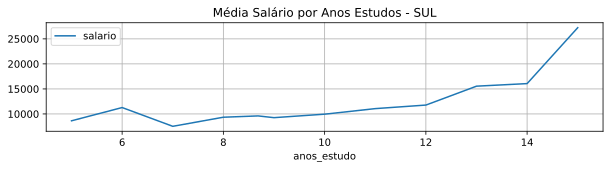

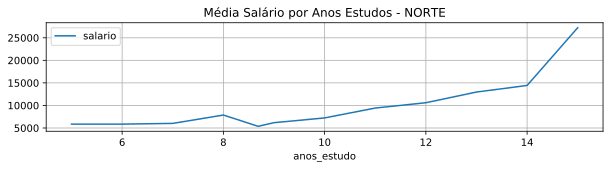

In [27]:
grafico_estudo_sul[['salario']].plot(figsize=(10, 2), title='Média Salário por Anos Estudos - SUL', grid=True) 
grafico_estudo_norte[['salario']].plot(figsize=(10, 2), title='Média Salário por Anos Estudos - NORTE', grid=True)

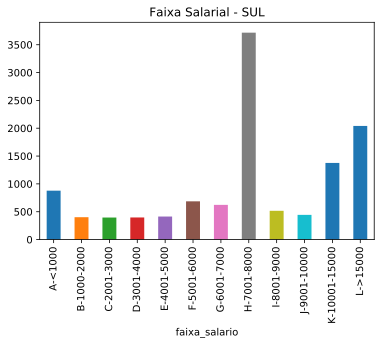

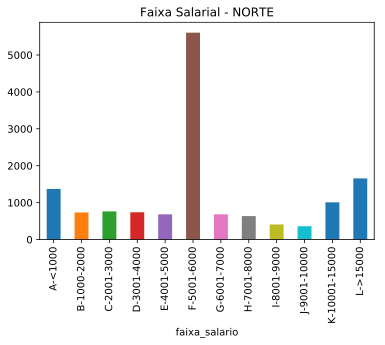

In [28]:
grafico_faixasalario_sul.plot(y="salario", kind="bar", legend= False, title="Faixa Salarial - SUL" )
grafico_faixasalario_norte.plot(y="salario", kind="bar", legend= False, title="Faixa Salarial - NORTE" )

# Estudando a coluna normalizada: média e desvio padrão

In [50]:
# SUL - z-score para distribuição normal
x_sul = SUL.normal_log_salario.sample(10000) #definindo uma amostra de 10000 salários
mu_sul = np.mean(x_sul) #média da coluna normalizada
std_sul = np.std(x_sul) #desvio padrão da coluna normalizada

# NORTE - z-score para distribuição normal
x_norte = NORTE.normal_log_salario.sample(10000) #estudando a coluna normalizada região sul NORTE['normal_log_salario'] 
mu_norte = np.mean(x_norte) #média da coluna normalizada
std_norte = np.std(x_norte) #desvio padrão da coluna normalizada

# SUDESTE - z-score para distribuição normal
x_sudeste = SUDESTE.normal_log_salario.sample(10000) #estudando a coluna normalizada região sul
mu_sudeste = np.mean(x_sudeste) #média da coluna normalizada
std_sudeste = np.std(x_sudeste) #desvio padrão da coluna normalizada

# ENTRO_OESTE - z-score para distribuição normal
x_centro_oeste = CENTRO_OESTE.normal_log_salario.sample(10000) #estudando a coluna normalizada região sul
mu_centro_oeste = np.mean(x_centro_oeste) #média da coluna normalizada
std_centro_oeste = np.std(x_centro_oeste) #desvio padrão da coluna normalizada

# Calculando o p_value - medida de quanta evidência há contra a hipótese nula H0. Quanto menor maior evidência há.

In [32]:
import scipy
from scipy import stats

# SUL
p_value_sul = scipy.stats.norm(mu_sul, std_sul).pdf(2*std_sul)#o p_value é o valor fora dos 95% ,
p_value_sul

# NORTE
p_value_norte = scipy.stats.norm(mu_norte, std_norte).pdf(2*std_norte) #o p_value é o valor fora dos 95% , 
p_value_norte

# SUDESTE
p_value_sudeste = scipy.stats.norm(mu_sudeste, std_sudeste).pdf(2*std_sudeste) #o p_value é o valor fora dos 95% , 
p_value_norte

# CENTRO-OESTE
p_value_centro_oeste = scipy.stats.norm(mu_centro_oeste, std_centro_oeste).pdf(2*std_centro_oeste) #o p_value é o valor fora dos 95% , 
p_value_centro_oeste



0.0527329346512112

# Calculando o intervalo de confiança (z_score)

In [34]:
scipy.stats.norm.interval(alpha=0.95,loc=mu_sul,scale=std_sul) #SUL
scipy.stats.norm.interval(alpha=0.95,loc=mu_norte,scale=std_norte) #NORTE
scipy.stats.norm.interval(alpha=0.95,loc=mu_sudeste,scale=std_sudeste) #SUDESTE
scipy.stats.norm.interval(alpha=0.95,loc=mu_centro_oeste,scale=std_centro_oeste) #CENTRO-OESTE

Z_score_inf_sul = scipy.stats.norm.interval(alpha=0.95,loc=mu_sul,scale=std_sul)[0]
Z_score_sup_sul = scipy.stats.norm.interval(alpha=0.95,loc=mu_sul,scale=std_sul)[1]

Z_score_inf_norte = scipy.stats.norm.interval(alpha=0.95,loc=mu_norte,scale=std_norte)[0]
Z_score_sup_norte = scipy.stats.norm.interval(alpha=0.95,loc=mu_norte,scale=std_norte)[1]

Z_score_inf_sudeste = scipy.stats.norm.interval(alpha=0.95,loc=mu_sudeste,scale=std_sudeste)[0]
Z_score_sup_sudeste = scipy.stats.norm.interval(alpha=0.95,loc=mu_sudeste,scale=std_sudeste)[1]

Z_score_inf_centro_oeste = scipy.stats.norm.interval(alpha=0.95,loc=mu_centro_oeste,scale=std_centro_oeste)[0]
Z_score_sup_centro_oeste = scipy.stats.norm.interval(alpha=0.95,loc=mu_centro_oeste,scale=std_centro_oeste)[1]



# Métricas obtidas.

 ### 1 - Médias e desvios padrões dos salários normalizados:

In [45]:
print('SUL -----------média ', mu_sul,'-------------desvio padrão', std_sul)
print('NORTE -----------média ', mu_norte,'-----------desvio padrão', std_norte)
print('SUDESTE -----------média  ', mu_sudeste, '-----------desvio padrão', std_sudeste)
print('CENTRO-OESTE -----------média  ', mu_centro_oeste, '-----------desvio padrão', std_centro_oeste)

SUL -----------média  0.00012067000995313868 -------------desvio padrão 0.9996307460030592
NORTE -----------média  -0.007094787125557394 -----------desvio padrão 1.023511173503576
SUDESTE -----------média   -0.0009618281687718138 -----------desvio padrão 0.9995020417268683
CENTRO-OESTE -----------média   -0.005954976588271196 -----------desvio padrão 1.011858611222732


### 2 - P_value

In [36]:
print('SUL p_value é: ', p_value_sul)
print('NORTE p_value é: ', p_value_norte)
print('SUDESTE p_value é: ', p_value_sudeste)
print('CENTRO-OESTE p_value é: ', p_value_centro_oeste)

SUL p_value é:  0.054023951247440534
NORTE p_value é:  0.052023214600056496
SUDESTE p_value é:  0.053913976595499416
CENTRO-OESTE p_value é:  0.0527329346512112


### 3 - Intervalo de confiança (z_score)

In [37]:
print('SUL intervalo de confiança: ', Z_score_inf_sul, '<------>', Z_score_sup_sul)
print('NORTE intervalo de confiança: ', Z_score_inf_norte, '<------>', Z_score_sup_norte)
print('SUDESTE intervalo de confiança: ', Z_score_inf_sudeste, '<------>', Z_score_sup_sudeste)
print('CENTRO-OESTE intervalo de confiança: ', Z_score_inf_centro_oeste, '<------>', Z_score_sup_centro_oeste)


SUL intervalo de confiança:  -1.9591195899949494 <------> 1.9593609300148558
NORTE intervalo de confiança:  -2.013139824966893 <------> 1.998950250715778
SUDESTE intervalo de confiança:  -1.9599498324276838 <------> 1.9580261760901403
CENTRO-OESTE intervalo de confiança:  -1.9891614120315422 <------> 1.9772514588549999


# VERIFICANDO AS HIPÓTESES

### 1 - Os salários na região Sul são maiores que os da região Norte?

In [38]:
Z_score_inf_sul < mu_norte < Z_score_sup_sul

True

Resultado: TRUE. Podemos afirmar com 95% de certeza que a média dos salários da região Norte está contida no intervalo de confiança da região Sul.

Resposta: Falhamos em aceitar H0: os salários na região Sul são maiores que os da região Norte? - não há evidência estatística para uma resposta afirmativa.

### 2 - Há alguma região com salário maior que as demais?

---------------->  Região SUL versus demais regiões:

In [39]:
print('A média de salario da região Centro-Oeste está em Sul?', Z_score_inf_sul < mu_centro_oeste <Z_score_sup_sul)
print('A média de salario da região Norte está em Sul?', Z_score_inf_sul < mu_norte < Z_score_sup_sul)
print('A média de salario da região Sudeste está em Sul?', Z_score_inf_sul < mu_sudeste < Z_score_sup_sul)


A média de salario da região Centro-Oeste está em Sul? True
A média de salario da região Norte está em Sul? True
A média de salario da região Sudeste está em Sul? True


---------------->  Região NORTE versus demais regiões:

In [40]:
print('A média de salario da região Centro-Oeste está em Norte?', Z_score_inf_norte < mu_centro_oeste <Z_score_sup_norte)
print('A média de salario da região Sul está em Norte?', Z_score_inf_norte < mu_sul < Z_score_sup_norte)
print('A média de salario da região Sudeste está em Norte?', Z_score_inf_norte < mu_sudeste < Z_score_sup_norte)

A média de salario da região Centro-Oeste está em Norte? True
A média de salario da região Sul está em Norte? True
A média de salario da região Sudeste está em Norte? True


---------------->  Região SUDESTE versus demais regiões:

In [41]:
print('A média de salario da região Centro-Oeste está em Sudeste?', Z_score_inf_sudeste < mu_centro_oeste <Z_score_sup_sudeste)
print('A média de salario da região Sul está em Sudeste?', Z_score_inf_sudeste < mu_sul < Z_score_sup_sudeste)
print('A média de salario da região Norte está em Sudeste?', Z_score_inf_sudeste < mu_norte < Z_score_sup_sudeste)

A média de salario da região Centro-Oeste está em Sudeste? True
A média de salario da região Sul está em Sudeste? True
A média de salario da região Norte está em Sudeste? True


---------------->  Região CENTRO-OESTE versus demais regiões:

In [46]:
print('A média de salario da região Sudeste está em Centro-Oeste?', Z_score_inf_centro_oeste < mu_sudeste <Z_score_sup_centro_oeste)
print('A média de salario da região Sul está em Centro-Oeste?', Z_score_inf_centro_oeste < mu_sul < Z_score_sup_centro_oeste)
print('A média de salario da região Norte está em Centro-Oeste?', Z_score_inf_centro_oeste < mu_norte < Z_score_sup_centro_oeste)

A média de salario da região Sudeste está em Centro-Oeste? True
A média de salario da região Sul está em Centro-Oeste? True
A média de salario da região Norte está em Centro-Oeste? True


Resposta: Falhamos em aceitar H0: todos os resultados indicam que as médias de cada região estão contidas nos intervalos de confiança das demais regiões.